**Loading data from csv**


In [363]:
import pandas as pd

In [364]:
sp500 = pd.read_csv('^GSPC.csv',na_values=['null'],na_filter=True).set_index('Date')
dax = pd.read_csv('^GDAXI.csv',na_values=['null'],na_filter=True).set_index('Date')
nikkei225 = pd.read_csv('^N225.csv',na_values=['null'],na_filter=True).set_index('Date')
hsi = pd.read_csv('^HSI.csv',na_values=['null'],na_filter=True).set_index('Date')
cac = pd.read_csv('^FCHI.csv',na_values=['null'],na_filter=True).set_index('Date')
vix = pd.read_csv('^VIX.csv',na_values=['null'],na_filter=True).set_index('Date')

** Preprocessing data **

In [365]:
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [366]:
closed_data = pd.DataFrame()
closed_data['sp_closed'] = sp500['Adj Close']
closed_data['dax_closed'] = dax['Adj Close']
closed_data['n225_closed'] = nikkei225['Adj Close']
closed_data['hsi_closed'] = hsi['Adj Close']
closed_data['cac_closed'] = cac['Adj Close']
closed_data['vix_closed'] = vix['Adj Close']
closed_data = closed_data.fillna(method='ffill').dropna()

In [367]:
#closed_data.describe()
closed_data.head()

,sp_closed,dax_closed,n225_closed,hsi_closed,cac_closed,vix_closed
Date,,,,,,
2000-01-04,1399.420044,6586.950195,19002.859375,17072.820313,5672.020020,27.010000
2000-01-05,1402.109985,6502.069824,18542.550781,15846.719727,5479.700195,26.410000
2000-01-06,1403.449951,6474.919922,18168.269531,15153.230469,5450.109863,25.730000
2000-01-07,1441.469971,6780.959961,18193.410156,15405.629883,5539.609863,21.719999
2000-01-10,1457.599976,6925.520020,18193.410156,15848.150391,5646.120117,21.709999


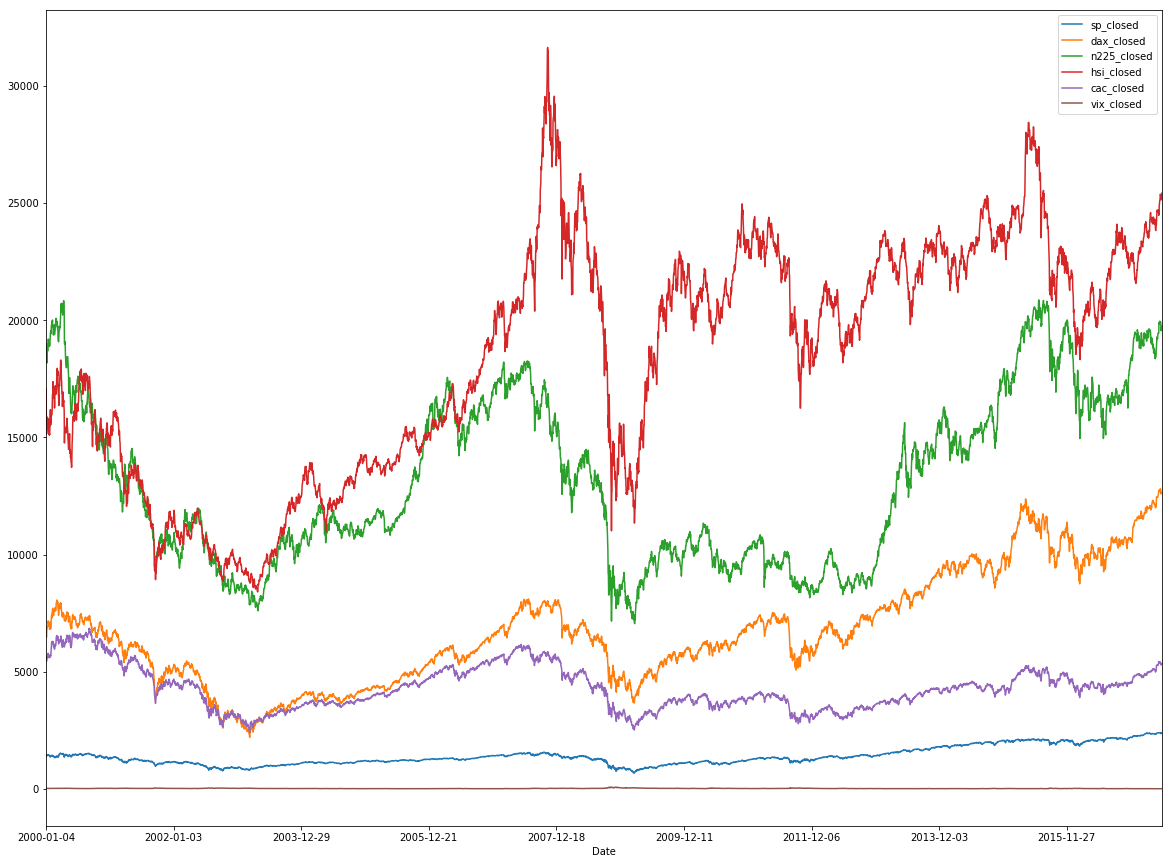

In [368]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.
_ = pd.concat([closed_data['sp_closed'],closed_data['dax_closed'],closed_data['n225_closed'],closed_data['hsi_closed'],
              closed_data['cac_closed'],closed_data['vix_closed']], 
              axis=1).plot(figsize=(20, 15))

In [369]:
closed_data['sp_closed_scaled'] = closed_data['sp_closed']/max(closed_data['sp_closed'])
closed_data['dax_closed_scaled'] = closed_data['dax_closed']/max(closed_data['dax_closed'])
closed_data['n225_closed_scaled'] = closed_data['n225_closed']/max(closed_data['n225_closed'])
closed_data['hsi_closed_scaled'] = closed_data['hsi_closed']/max(closed_data['hsi_closed'])
closed_data['cac_closed_scaled'] = closed_data['cac_closed']/max(closed_data['cac_closed'])
closed_data['vix_closed_scaled'] = closed_data['vix_closed']/max(closed_data['vix_closed'])

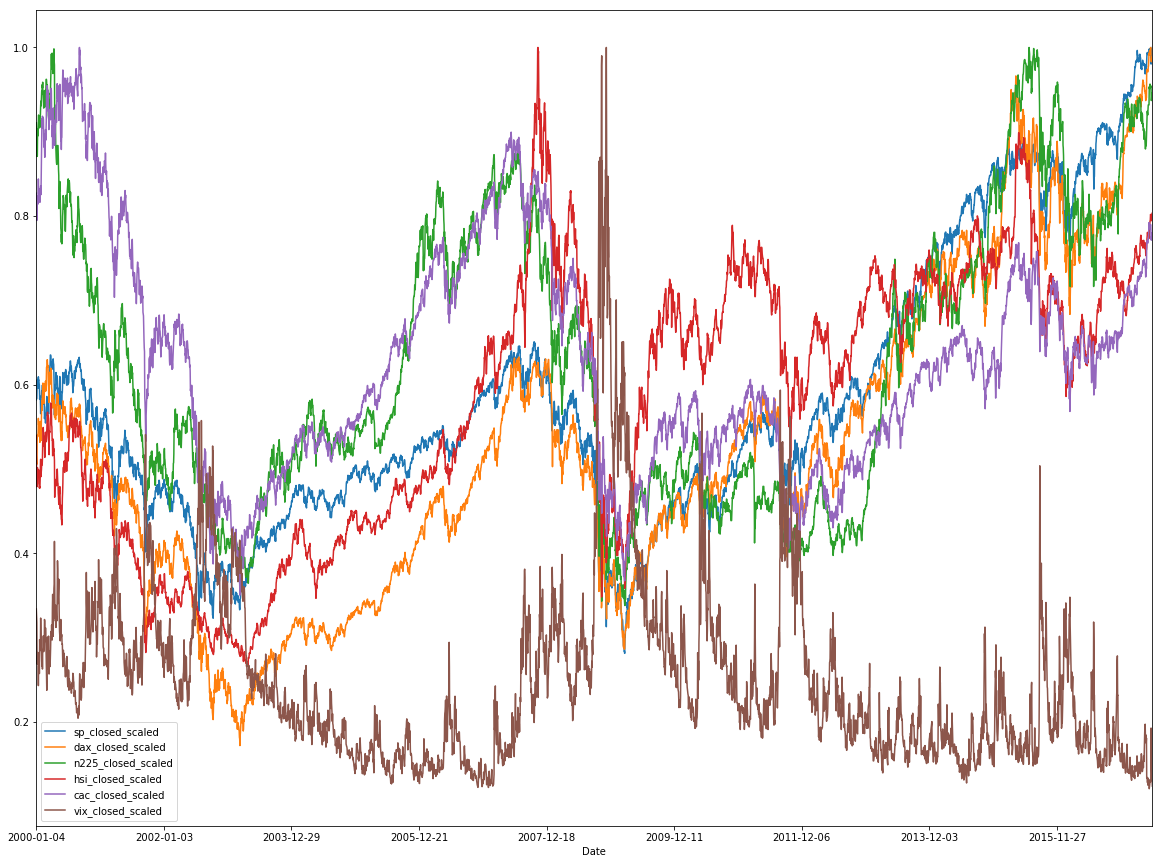

In [370]:
_ = pd.concat([closed_data['sp_closed_scaled'],closed_data['dax_closed_scaled'],closed_data['n225_closed_scaled'],
              closed_data['hsi_closed_scaled'],closed_data['cac_closed_scaled'],closed_data['vix_closed_scaled']], 
              axis=1).plot(figsize=(20, 15))

** Autocorrelation Plot **

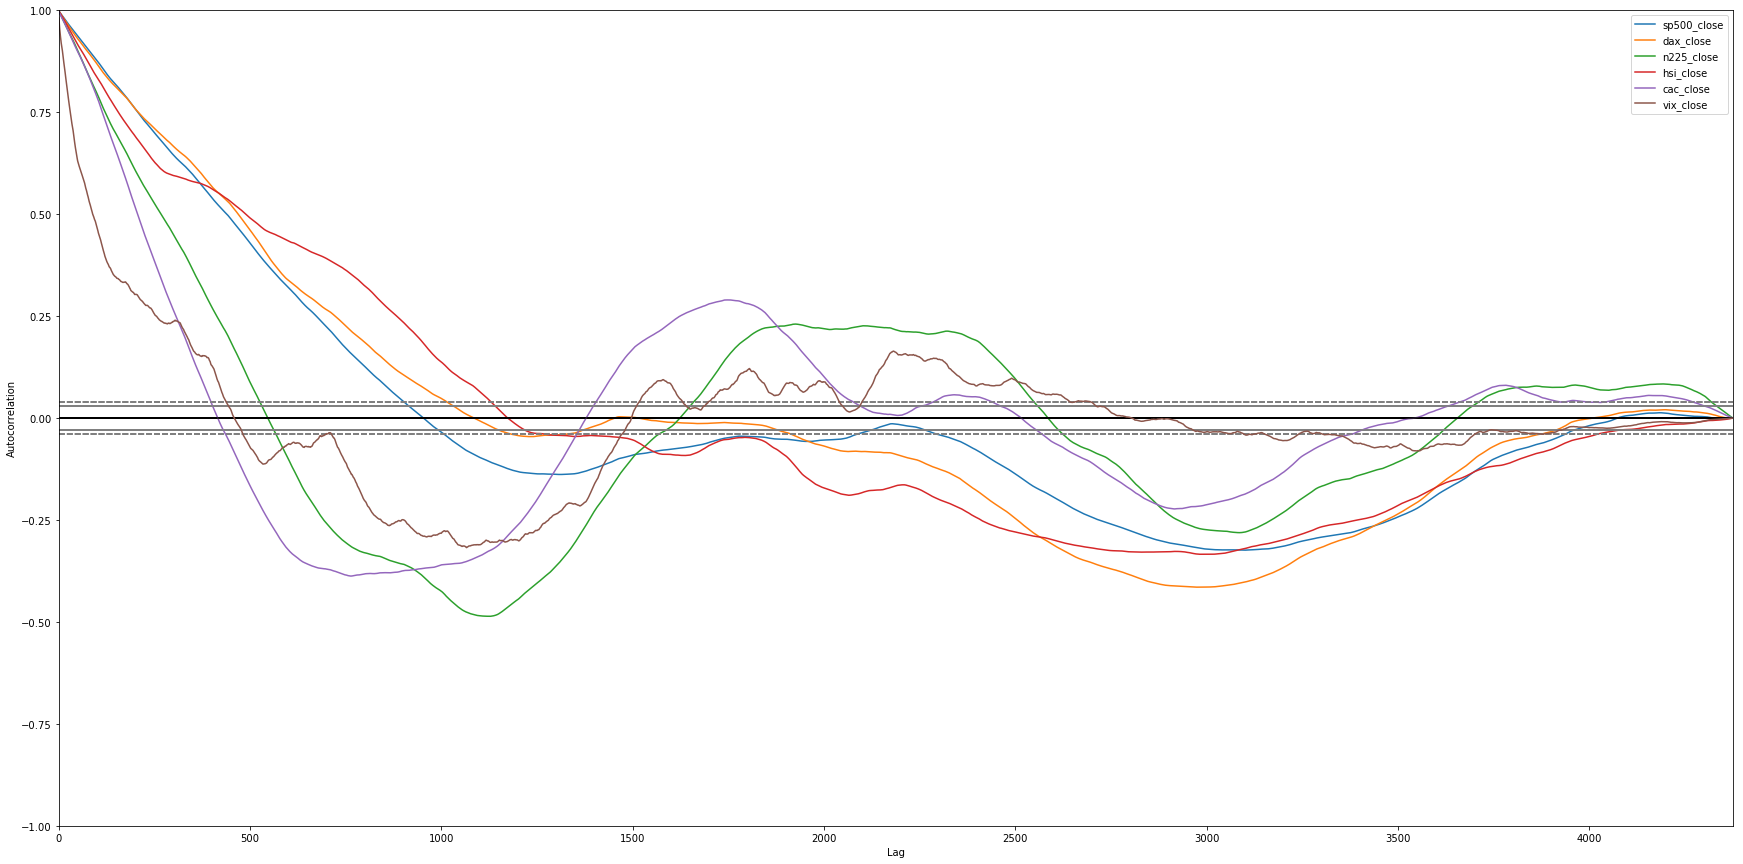

In [371]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(15)
_ = autocorrelation_plot(closed_data['sp_closed'], label='sp500_close')
_ = autocorrelation_plot(closed_data['dax_closed'], label='dax_close')
_ = autocorrelation_plot(closed_data['n225_closed'], label='n225_close')
_ = autocorrelation_plot(closed_data['hsi_closed'], label='hsi_close')
_ = autocorrelation_plot(closed_data['cac_closed'], label='cac_close')
_ = autocorrelation_plot(closed_data['vix_closed'], label='vix_close')
_ = plt.legend(loc='upper right')

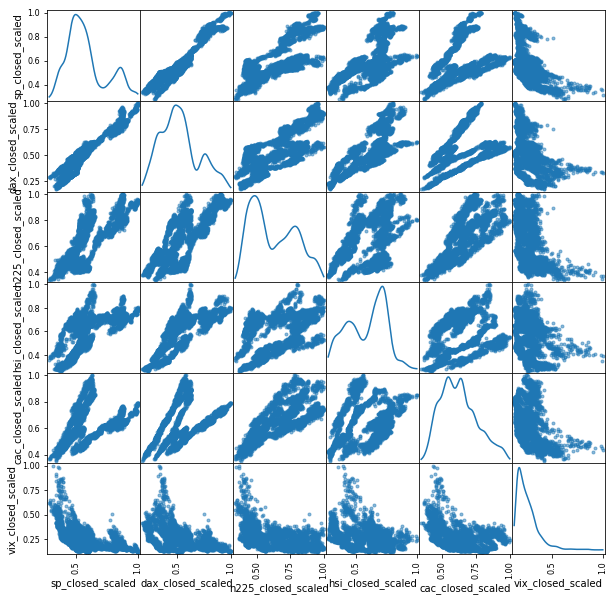

In [372]:
_ = scatter_matrix(pd.concat([closed_data['sp_closed_scaled'],closed_data['dax_closed_scaled'],
                              closed_data['n225_closed_scaled'],closed_data['hsi_closed_scaled'],
                              closed_data['cac_closed_scaled'],closed_data['vix_closed_scaled'],
  ], axis=1),figsize=(10, 10), diagonal='kde')

** Data Transform **

In [373]:
log_return = pd.DataFrame()
log_return['sp'] = np.log(closed_data['sp_closed']/closed_data['sp_closed'].shift())
log_return['dax'] = np.log(closed_data['dax_closed']/closed_data['dax_closed'].shift())
log_return['n225'] = np.log(closed_data['n225_closed']/closed_data['n225_closed'].shift())
log_return['hsi'] = np.log(closed_data['hsi_closed']/closed_data['hsi_closed'].shift())
log_return['cac'] = np.log(closed_data['cac_closed']/closed_data['cac_closed'].shift())
log_return['vix'] = np.log(closed_data['vix_closed']/closed_data['vix_closed'].shift())

#log_return = log_return.dropna()
#log_return.describe()
log_return.head()

,sp,dax,n225,hsi,cac,vix
Date,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.001920,-0.012970,-0.024521,-0.074525,-0.034495,-0.022464
2000-01-06,0.000955,-0.004184,-0.020391,-0.044749,-0.005415,-0.026085
2000-01-07,0.026730,0.046182,0.001383,0.016519,0.016288,-0.169424
2000-01-10,0.011128,0.021094,0.000000,0.028320,0.019045,-0.000461


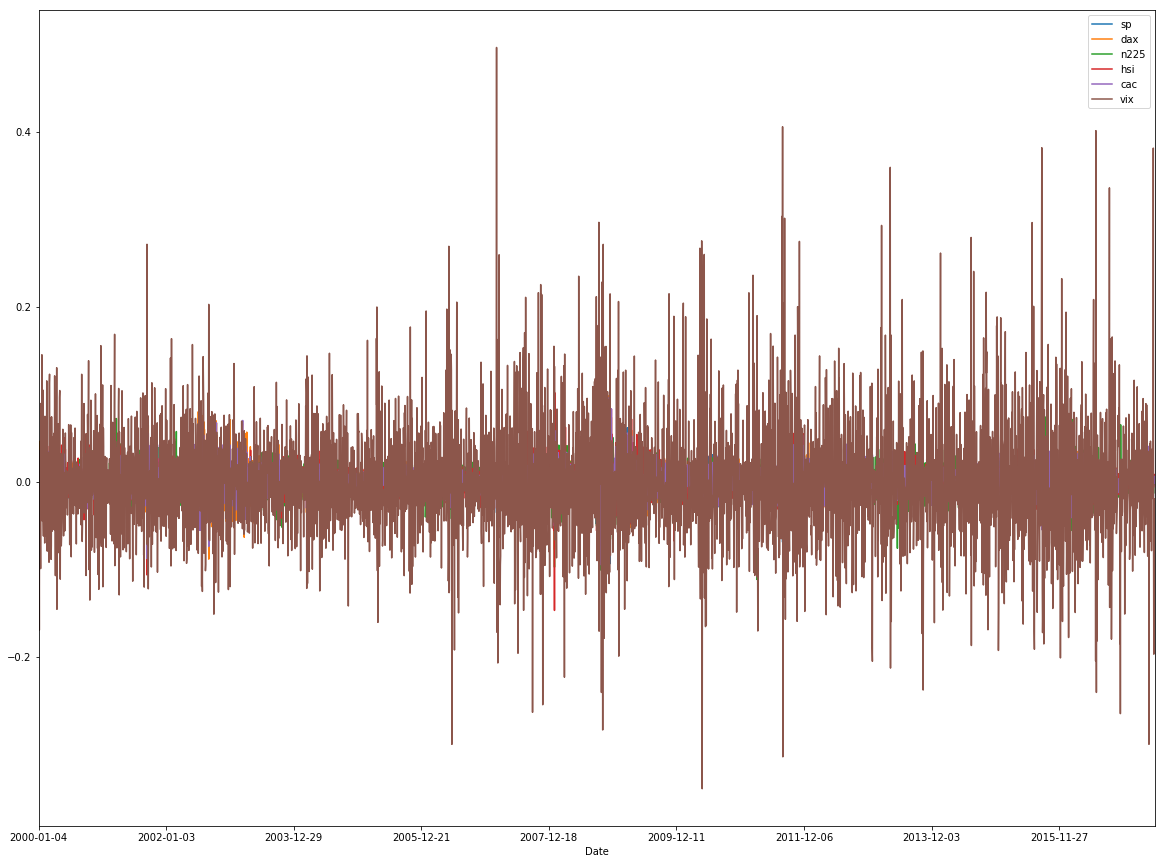

In [374]:
_ = pd.concat([log_return['sp'],log_return['dax'],log_return['n225'],
              log_return['hsi'],log_return['cac'],log_return['vix']],axis=1).plot(figsize=(20,15))

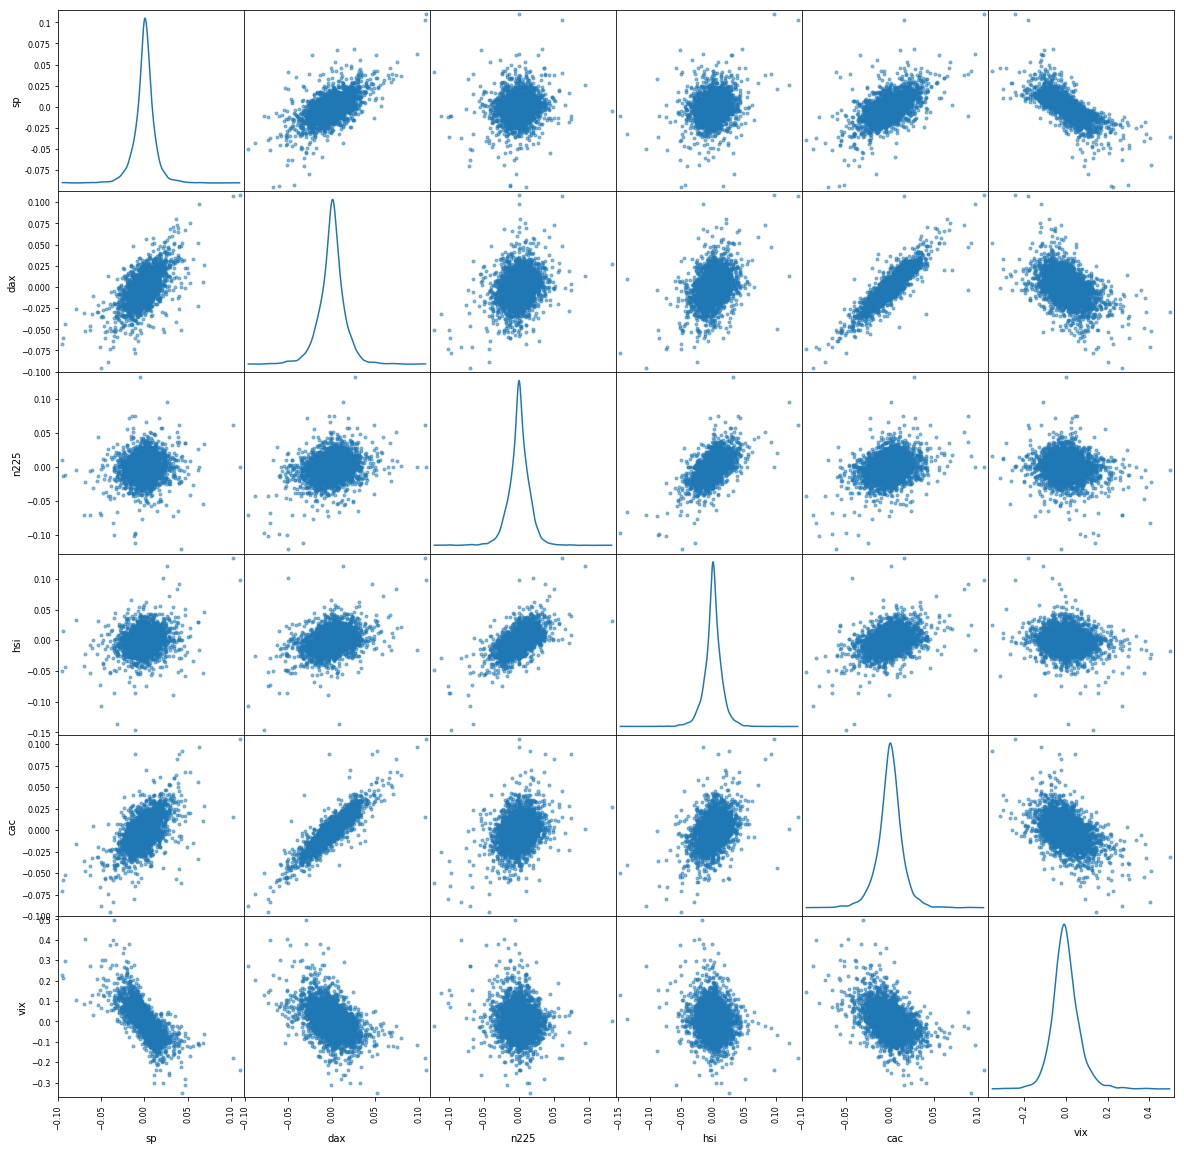

In [375]:
_ = scatter_matrix(log_return, figsize=(20, 20), diagonal='kde')

** Set-up Train test dataset **

In [376]:
# set label to 1 if sp greater than 0 otherwise to 0
log_return['sp_postive'] = log_return['sp'].apply(lambda x:1 if x>=0 else 0)
#log_return['sp_negative'] = log_return['sp'].apply(lambda x: 1 if x<0 else 0)
log_return.head()

,sp,dax,n225,hsi,cac,vix,sp_postive
Date,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-05,0.001920,-0.012970,-0.024521,-0.074525,-0.034495,-0.022464,1
2000-01-06,0.000955,-0.004184,-0.020391,-0.044749,-0.005415,-0.026085,1
2000-01-07,0.026730,0.046182,0.001383,0.016519,0.016288,-0.169424,1
2000-01-10,0.011128,0.021094,0.000000,0.028320,0.019045,-0.000461,1


In [377]:
training_test_data = pd.DataFrame(
    columns = ['sp_positive','sp_1','sp_2','sp_3','vix_1','vix_2','vix_3',
               'dax_0','dax_1','dax_2','dax_3',
               'n225_0','n225_1','n225_2','n225_3',
              'hsi_0','hsi_1','hsi_2','hsi_3',
               'cac_0','cac_1','cac_2','cac_3']
)

for i in range(4,len(log_return)):
    sp_positive = log_return['sp_postive'].iloc[i]
    sp_1 = log_return['sp'].iloc[i-1]
    sp_2 = log_return['sp'].iloc[i-2]
    sp_3 = log_return['sp'].iloc[i-3]
    vix_1 = log_return['vix'].iloc[i-1]
    vix_2 = log_return['vix'].iloc[i-2]
    vix_3 = log_return['vix'].iloc[i-3]
    dax_0 = log_return['dax'].iloc[i]
    dax_1 = log_return['dax'].iloc[i-1]
    dax_2 = log_return['dax'].iloc[i-2]
    dax_3 = log_return['dax'].iloc[i-3]
    n225_0 = log_return['n225'].iloc[i]
    n225_1 = log_return['n225'].iloc[i-1]
    n225_2 = log_return['n225'].iloc[i-2]
    n225_3 = log_return['n225'].iloc[i-3]
    hsi_0 = log_return['hsi'].iloc[i]
    hsi_1 = log_return['hsi'].iloc[i-1]
    hsi_2 = log_return['hsi'].iloc[i-2]
    hsi_3 = log_return['hsi'].iloc[i-3]
    cac_0 = log_return['cac'].iloc[i]
    cac_1 = log_return['cac'].iloc[i-1]
    cac_2 = log_return['cac'].iloc[i-2]
    cac_3 = log_return['cac'].iloc[i-3]
    training_test_data = training_test_data.append(
        {'sp_positive':sp_positive,'sp_1':sp_1,'sp_2':sp_2,'sp_3':sp_3,
         'vix_1':vix_1, 'vix_2':vix_2,'vix_3':vix_3,
         'dax_0':dax_0,'dax_1':dax_1,'dax_2':dax_2,'dax_3':dax_3,
         'n225_0':n225_0,'n225_1':n225_1,'n225_2':n225_2,'n225_3':n225_3,
         'hsi_0':hsi_0,'hsi_1':hsi_1,'hsi_2':hsi_2,'hsi_3':hsi_3,
         'cac_0':hsi_0,'cac_1':cac_1,'cac_2':cac_2,'cac_3':cac_3,
        },
        ignore_index = True
    )
            
training_test_data.head()
#training_test_data.describe()

,sp_positive,sp_1,sp_2,sp_3,vix_1,vix_2,vix_3,dax_0,dax_1,dax_2,...,n225_2,n225_3,hsi_0,hsi_1,hsi_2,hsi_3,cac_0,cac_1,cac_2,cac_3
0,1.0,0.026730,0.000955,0.001920,-0.169424,-0.026085,-0.022464,0.021094,0.046182,-0.004184,...,-0.020391,-0.024521,0.028320,0.016519,-0.044749,-0.074525,0.028320,0.016288,-0.005415,-0.034495
1,0.0,0.011128,0.026730,0.000955,-0.000461,-0.169424,-0.026085,-0.004961,0.021094,0.046182,...,0.001383,-0.020391,0.000880,0.028320,0.016519,-0.044749,0.000880,0.019045,0.016288,-0.005415
2,0.0,-0.013149,0.011128,0.026730,0.035742,-0.000461,-0.169424,0.003124,-0.004961,0.021094,...,0.000000,0.001383,-0.009368,0.000880,0.028320,0.016519,-0.009368,-0.005723,0.019045,0.016288
3,1.0,-0.004396,-0.013149,0.011128,0.014998,0.035742,-0.000461,0.006225,0.003124,-0.004961,...,0.035502,0.000000,-0.005119,-0.009368,0.000880,0.028320,-0.005119,-0.005609,-0.005723,0.019045
4,1.0,0.012096,-0.004396,-0.013149,-0.050740,0.014998,0.035742,0.030753,0.006225,0.003124,...,-0.009246,0.035502,-0.005885,-0.005119,-0.009368,0.000880,-0.005885,0.009048,-0.005609,-0.005723


**Split training test data **

In [378]:
features = training_test_data[training_test_data.columns[1:]]
label = training_test_data[training_test_data.columns[:1]]
training_set_size = int(len(training_test_data) * 0.8)
test_set_size = len(training_test_data) - training_set_size
X_train = features[:training_set_size]
X_test = features[training_set_size:]
y_train = label[:training_set_size]
y_test = label[training_set_size:]
print ("Training set has {} samples.".format(training_set_size))
print ("Testing set has {} samples.".format(test_set_size))

Training set has 3496 samples.
Testing set has 875 samples.


In [379]:
n_records = label.index.shape[0]
n_positive = label[label.sp_positive==1].shape[0]
n_negative = label[label.sp_positive==0].shape[0]
positive_percent = (n_positive/np.float(n_records))*100.0
print ("Total number of records: {}".format(n_records))
print ("Days S&P 500 closed positively: {}".format(n_positive))
print ("Days S&P 500 closed negatively: {}".format(n_negative))
print ("Percentage of positive days: {:.2f}%".format(positive_percent))

Total number of records: 4371
Days S&P 500 closed positively: 2322
Days S&P 500 closed negatively: 2049
Percentage of positive days: 53.12%


In [380]:
# Naive Predictor
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,fbeta_score
y = label.values
y_pred = np.ones(y.shape)
fscore = fbeta_score(y,y_pred,beta=0.5)
accuracy = accuracy_score(y,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.5312, F-score: 0.5862]


In [381]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_l = LogisticRegression(random_state=0)
clf_l.fit(X_train,y_train.values.ravel())
y_pred = clf_l.predict(X_test)
fscore = fbeta_score(y_test,y_pred,beta=0.5)
accuracy = accuracy_score(y_test,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.6034, F-score: 0.6224]


In [382]:
#SVM
from sklearn import svm
clf_s = svm.SVC(kernel='rbf',random_state=0)
clf_s.fit(X_train,y_train.values.ravel())
y_pred = clf_s.predict(X_test)
fscore = fbeta_score(y_test,y_pred,beta=0.5)
accuracy = accuracy_score(y_test,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.5234, F-score: 0.5786]


In [383]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
clf_g = GradientBoostingClassifier(random_state=0)
clf_g.fit(X_train,y_train.values.ravel())
y_pred = clf_g.predict(X_test)
fscore = fbeta_score(y_test,y_pred,beta=0.5)
accuracy = accuracy_score(y_test,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.6766, F-score: 0.6838]


In [384]:
#GradientBoosting prams tuning
from sklearn.ensemble import GradientBoostingClassifier
clf_g = GradientBoostingClassifier(loss='exponential',learning_rate=0.01,max_depth=4,random_state=0)
clf_g.fit(X_train,y_train.values.ravel())
y_pred = clf_g.predict(X_test)
fscore = fbeta_score(y_test,y_pred,beta=0.5)
accuracy = accuracy_score(y_test,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.6949, F-score: 0.6958]


** XGBoost **

In [385]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.values,y_train.values)
dtest = xgb.DMatrix(X_test.values)
param = {'max_depth':6,'eta':0.01,'num_class':2, 'objective':'multi:softmax' }
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
fscore = fbeta_score(y_test,y_pred,beta=0.5)
accuracy = accuracy_score(y_test.values,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.6937, F-score: 0.6989]


** Cross validation **

In [387]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import GradientBoostingClassifier
features = training_test_data[training_test_data.columns[1:]]
label = training_test_data[training_test_data.columns[:1]]
tscv = TimeSeriesSplit(n_splits=50)
average_accuracy = []
average_fscore = []
for train_index,test_index in tscv.split(label):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index]
    clf_g = GradientBoostingClassifier(loss='exponential',learning_rate=0.01,max_depth=4,random_state=0)
    clf_g.fit(X_train,y_train.values.ravel())
    y_pred = clf_g.predict(X_test)
    fscore = fbeta_score(y_test,y_pred,beta=0.5)
    average_fscore.append(fscore)
    accuracy = accuracy_score(y_test,y_pred)
    average_accuracy.append(accuracy)
    print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print ("[Average accuracy score: {:.4f}, Average F-score: {:.4f}]".format(np.average(average_accuracy),np.average(average_fscore)))  

[Accuracy score: 0.6353, F-score: 0.6117]
[Accuracy score: 0.6235, F-score: 0.5828]
[Accuracy score: 0.5765, F-score: 0.5357]
[Accuracy score: 0.6235, F-score: 0.6069]
[Accuracy score: 0.7059, F-score: 0.7071]
[Accuracy score: 0.6706, F-score: 0.5639]
[Accuracy score: 0.6588, F-score: 0.6579]
[Accuracy score: 0.7412, F-score: 0.7419]
[Accuracy score: 0.7412, F-score: 0.7711]
[Accuracy score: 0.5647, F-score: 0.6218]
[Accuracy score: 0.5412, F-score: 0.5519]
[Accuracy score: 0.5765, F-score: 0.6053]
[Accuracy score: 0.6353, F-score: 0.7292]
[Accuracy score: 0.5882, F-score: 0.6190]
[Accuracy score: 0.5647, F-score: 0.6295]
[Accuracy score: 0.7176, F-score: 0.7543]
[Accuracy score: 0.6000, F-score: 0.6295]
[Accuracy score: 0.6353, F-score: 0.6226]
[Accuracy score: 0.7412, F-score: 0.7895]
[Accuracy score: 0.6471, F-score: 0.6701]
[Accuracy score: 0.6941, F-score: 0.7227]
[Accuracy score: 0.5765, F-score: 0.5882]
[Accuracy score: 0.6235, F-score: 0.6188]
[Accuracy score: 0.7765, F-score: 